First initialise notebook

In [26]:
import sys
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pylab
import imageio
from scipy.misc import imresize, imsave
import io
import time
%matplotlib inline  
os.sys.path

['',
 '/home/evdokimovn/miniconda3/envs/tensorflow/lib/python35.zip',
 '/home/evdokimovn/miniconda3/envs/tensorflow/lib/python3.5',
 '/home/evdokimovn/miniconda3/envs/tensorflow/lib/python3.5/plat-linux',
 '/home/evdokimovn/miniconda3/envs/tensorflow/lib/python3.5/lib-dynload',
 '/home/evdokimovn/miniconda3/envs/tensorflow/lib/python3.5/site-packages',
 '/home/evdokimovn/miniconda3/envs/tensorflow/lib/python3.5/site-packages/setuptools-27.2.0-py3.5.egg',
 '/home/evdokimovn/miniconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/extensions',
 '/home/evdokimovn/.ipython']

In [3]:
def reshape(array):
    width = array.shape[0]//32
    height = array.shape[1]//32
    return imresize(array, (32 * width, 32 * height, array.shape[2]))

def prepare_data(filename, output, video):
    frames = []
    if video:
        vid = imageio.get_reader(filename,  'ffmpeg')
        l = len(vid)
        for i in range(l):
            frame_ = vid.get_data(i)
            frame = reshape(frame_)
            frames.append(frame)
    else:
        img_array = imageio.imread(input_image_path)
        img_array = reshape(img_array)
        frames.append(img_array)
    np.save(output, frames)

Prepare layers used in our neural network. Over all network has 16 layers

In [4]:
def get_output_tensor_names():
  name_list = ['GruBinarizer/SignBinarizer/Sign:0']
  for i in range(1, 16):
    name_list.append('GruBinarizer/SignBinarizer/Sign_{}:0'.format(i))
  return name_list

Define neural network parameters

In [5]:
model = 'nn/model/residual_gru.pb'
input_image_path = 'nn/images/video.mp4'
output_image_path = 'nn/images/video.npy'
outpur_codes_path = 'nn/codes/video_f.npz'
iteration = 15

with tf.gfile.FastGFile(input_image_path) as input_image:
    input_image_str = input_image.read()

In [6]:
prepare_data(input_image_path, output_image_path, True)

`img_array` is np arrays of our image. Let's plot it and see what we've got

In [7]:
step = 5
it = 16
img_array = np.load(output_image_path)[(it-1)*step:it*step]#[0:12:3]

Images shape:  (5, 352, 480, 3)


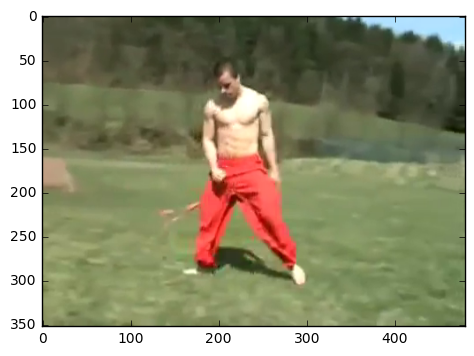

In [8]:
img = img_array[4]
print("Images shape: ", img_array.shape)
fig = pylab.figure()
pylab.imshow(img)

In [28]:
imsave('outfile.png', img)

`input_image_str` is string image representation and looks something like this

```
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\x00\x00\x00\x04\x00\x08\x06\x00\x00\x00V&>\x00\x00\x00\x0c`iCCPICC profile\x00\x00x\x01\x01H\x0c\xb7\xf3\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\x0c\x00\x00\x00$tech\x00\x00\x040\x00\x00\x00\x0crTRC\x00\x00\x04<\x00\x00\x08\x0cgTRC\x00\x00\x04<\x00\x00\x08\x0cbTRC\x00\x00\x04<\x00\x00\x08\x0ctext\x00\x00\x00\x00Copyright (c) 1998 Hewlett-Packard Company\x00\x00desc\x00\x00\x00\x00\x00\x00\x00\x12sRGB IEC61966-2.1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x12sRGB IEC61966-2.1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00XYZ \x00\x00\x00\x00\x00\x00\xf3Q\x00\x01\x00\x00\x00\x01\x16\xccXYZ \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00XYZ \x00\x00\x00\x00\x00\x00o\xa2\x00\x008\xf5\x00\x00\x03\x90XYZ \x00\x00\x00\x00\x00\x00b\x99\x00\x00\xb7\x85\x00\x00\x18\xdaXYZ \x00\x00\x00\x00\x00\x00$\xa0\x00\x00\x0f\x84\x00\x00\xb6\xcfdesc\x00\x00\x00\x00\x00\x00\x00\x16IEC http://www.iec.ch\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x16IEC http://www.iec.ch\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00desc\x00\x00\x00\x00\x00\x00\x00.IEC 61966-2.1 Default RGB colour space - sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00.IEC 61966-2.1 Default RGB colour space - sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00desc\x00\x00\x00\x00\x00\x00\x00,Reference Viewing Condition in IEC61966-2.1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00,Reference Viewing Condition in IEC61966-2.1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00view\x00\x00\x00\x00\x00\x13\xa4\xfe\x00\x14_.\x00\x10\xcf\x14\x00\x03\xed\xcc\x00\x04\x13\x0b\x00\x03\\\x9e\x00\x00\x00\x01XYZ \x00\x00\x00\x00\x00L\tV\x00P\x00\x00\x00W\x1f\xe7meas\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x8f\x00\x00\x00\x02sig \x00\x00\x00\x00CRT curv\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x05\x00\n\x00\x0f\x00\x14\x00\x19\x00\x1e\x00#\x00(\x00-\x002\x007\x00;\x00@\x00E\x00J\x00O\x00T\x00Y\x00^\x00c\x00h\x00m\x00r\x00w\x00|\x00\x81\x00\x86\x00\x8b\x00\x90\x00\x95\x00\x9a\x00\x9f\x00\xa4\x00\xa9\x00\xae\x00\xb2\x00\xb7\x00\xbc\x00\xc1\x00\xc6\x00\xcb\x00\xd0\x00\xd5\x00\xdb\x00\xe0\x00\xe5\x00\xeb\x00\xf0\x00\xf6\x00\xfb\x01\x01\x01\x07\x01\r\x01\x13\x01\x19\x01\x1f\x01%\x01+\x012\x018\x01>\x01E\x01L\x01R\x01Y\x01`\x01g\x01n\x01u\x01|\x01\x83\x01\x8b\x01\x92\x01\x9a\x01\xa1\x01\xa9\x01\xb1\x01\xb9\x01\xc1\x01\xc9\x01\xd1\x01\xd9\x01\xe1\x01\xe9\x01\xf2\x01\xfa\x02\x03\x02\x0c\x02\x14\x02\x1d\x02&\x02/\x028\x02A\x02K\x02T\x02]\x02g\x02q\x02z\x02\x84\x02\x8e\x02\x98\x02\xa2\x02\xac\x02\xb6\x02\xc1\x02\xcb\x02\xd5\x02\xe0\x02\xeb\x02\xf5\x03\x00\x03\x0b\x03\x16\x03!\x03-\x038\x03C\x03O\x03Z\x03f\x03r\x03~\x03\x8a\x03\x96\x03\xa2\x03\xae\x03\xba\x03\xc7\x03\xd3\x03\xe0\x03\xec\x03\xf9\x04\x06\x04\x13\x04 \x04-\x04;\x04H\x04U\x04c\x04q\x04~\x04\x8c\x04\x9a\x04\xa8\x04\xb6\x04\xc4\x04\xd3\x04\xe1\x04\xf0\x04\xfe\x05\r\x05\x1c\x05+\x05:\x05I\x05X\x05g\x05w\x05\x86\x05\x96\x05\xa6\x05\xb5\x05\xc5\x05\xd5\x05\xe5\x05\xf6\x06\x06\x06\x16\x06\'\x067\x06H\x06Y\x06j\x06{\x06\x8c\x06\x9d\x06\xaf\x06\xc0\x06\xd1\x06\xe3\x06\xf5\x07\x07\x07\x19\x07+\x07=\x07O\x07a\x07t\x07\x86\x07\x99\x07\xac\x07\xbf\x07\xd2\x07\xe5\x07\xf8\x08\x0b\x08\x1f\x082\x08F\x08Z\x08n\x08\x82\x08\x96\x08\xaa\x08\xbe\x08\xd2\x08\xe7\x08\xfb\t\x10\t%\t:\tO\td\ty\t\x8f\t\xa4\t\xba\t\xcf\t\xe5\t\xfb\n\x11\n\'\n=\nT\nj\n\x81\n\x98\n\xae\n\xc5\n\xdc\n\xf3\x0b\x0b\x0b"\x0b9\x0bQ\x0bi\x0b\x80\x0b\x98\x0b\xb0\x0b\xc8\x0b\xe1\x0b\xf9\x0c\x12\x0c*\x0cC\x0c
```

In [9]:
with tf.Graph().as_default() as graph:
    # Load the inference model for encoding.
    with tf.gfile.FastGFile(model, 'rb') as model_file:
      graph_def = tf.GraphDef()
      graph_def.ParseFromString(model_file.read())
    _ = tf.import_graph_def(graph_def, name='')

    input_tensor = graph.get_tensor_by_name('Placeholder:0')
    outputs = [graph.get_tensor_by_name(name) for name in
               get_output_tensor_names()]

And here we have trainign code for compression neural network

In [11]:
start = time.time()
with tf.Session(graph=graph) as sess:
    summary_writer = tf.train.SummaryWriter('nn/logs', sess.graph)
    #img_array = sess.run(decoded_image, feed_dict={input_image:
    #                                               input_image_str})
    results = sess.run(outputs, feed_dict={input_tensor: img_array})
done = time.time()
elapsed = done - start

It's interesting to see how much time it took to encode this batch

In [13]:
print(elapsed)

488.5276780128479


Finally save resulted codes to `npz` file

In [14]:
results = results[0:iteration + 1]
 
int_codes = np.asarray([x.astype(np.int8) for x in results])
# Convert int codes to binary.
int_codes = (int_codes + 1)/2
# Additionaly convert to int type
int_codes = int_codes.astype(int)
export = np.packbits(int_codes.reshape(-1))

output = io.BytesIO()
np.savez_compressed(output, shape=int_codes.shape, codes=export)
with tf.gfile.FastGFile(outpur_codes_path, 'w') as code_file:
    code_file.write(output.getvalue())

Now let's initialize decoder. First deal with network layers.

In [15]:
def get_input_tensor_names():
  name_list = ['GruBinarizer/SignBinarizer/Sign:0']
  for i in range(1, 16):
    name_list.append('GruBinarizer/SignBinarizer/Sign_{}:0'.format(i))
  return name_list


def get_output_tensor_names():
  return ['loop_{0:02d}/add:0'.format(i) for i in range(0, 16)]

Second load encoded file.

In [16]:
input_codes = outpur_codes_path
output_dir = 'nn/output'

In [17]:
contents = ''
with tf.gfile.FastGFile(input_codes, 'r') as code_file:
    contents = code_file.read()
    loaded_codes = np.load(io.BytesIO(contents))
    assert ['codes', 'shape'] not in loaded_codes.files
    loaded_shape = loaded_codes['shape']
    loaded_array = loaded_codes['codes']

    # Unpack and recover code shapes.
    unpacked_codes = np.reshape(np.unpackbits(loaded_array)
                                [:np.prod(loaded_shape)],
                                loaded_shape)

    numpy_int_codes = np.split(unpacked_codes, len(unpacked_codes))
    if iteration == -1:
      iteration = len(unpacked_codes) - 1
    
    # Convert back to float and recover scale.
    numpy_codes = [np.squeeze(x.astype(np.float32), 0) * 2 - 1 for x in
                   numpy_int_codes]

Thirdly initialize model graph and its parameters.

In [18]:
with tf.Graph().as_default() as graph:
    # Load the inference model for decoding.
    with tf.gfile.FastGFile(model, 'rb') as model_file:
      graph_def = tf.GraphDef()
      graph_def.ParseFromString(model_file.read())
    _ = tf.import_graph_def(graph_def, name='')

    # For encoding the tensors into PNGs.
    input_image = tf.placeholder(tf.uint8)
    encoded_image = tf.image.encode_png(input_image)

    input_tensors = [graph.get_tensor_by_name(name) for name in
                     get_input_tensor_names()][0:iteration+1]
    outputs = [graph.get_tensor_by_name(name) for name in
               get_output_tensor_names()][0:iteration+1]

feed_dict = {key: value for (key, value) in zip(input_tensors,
                                                  numpy_codes)}

In [23]:
print(feed_dict.keys())

dict_keys([<tf.Tensor 'GruBinarizer/SignBinarizer/Sign:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'GruBinarizer/SignBinarizer/Sign_8:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'GruBinarizer/SignBinarizer/Sign_13:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'GruBinarizer/SignBinarizer/Sign_6:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'GruBinarizer/SignBinarizer/Sign_10:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'GruBinarizer/SignBinarizer/Sign_15:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'GruBinarizer/SignBinarizer/Sign_7:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'GruBinarizer/SignBinarizer/Sign_1:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'GruBinarizer/SignBinarizer/Sign_3:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'GruBinarizer/SignBinarizer/Sign_14:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'GruBinarizer/SignBinarizer/Sign_2:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'GruBinarizer/SignBinarizer/Sign_11:0' sh

In [24]:
print(input_image)

Tensor("Placeholder_1:0", dtype=uint8)


Finally decode image and save it to output directory

In [319]:
img_prefix = 'vidtest'

In [320]:
startd = time.time()
with tf.Session(graph=graph) as sess:
    results = sess.run(outputs, feed_dict=feed_dict)

    #for index, result in enumerate(results):
    index = iteration
    res = results[iteration]
    for i in range(len(res)):
        result = res[i]
        img = np.uint8(np.clip(result + 0.5, 0, 255))
        img = img.squeeze()
        png_img = sess.run(encoded_image, feed_dict={input_image: img})

        with tf.gfile.FastGFile(os.path.join(output_dir,
                                               img_prefix+'_{0:02d}.png'.format(i+(it-1)*step)),
                                  'w') as output_image:
            output_image.write(png_img)
        
doned = time.time()

And again how much time did it take?

In [219]:
print(doned-startd)

129.566330909729


In [149]:
contents = np.load("output_codes.npz")
shape = contents['shape']
image = contents['codes']
image = np.reshape(image, (64, -1, 3))
image.shape



FileNotFoundError: [Errno 2] No such file or directory: 'output_codes.npz'

In [ ]:
fig = pylab.figure()
pylab.imshow(image)

In [ ]:
#http://stackoverflow.com/questions/29718238/how-to-read-mp4-video-to-be-processed-by-scikit-image
filename = 'images/fhm-snake.jpg'
image = imageio.imread(filename)
image.shape  # im is a numpy array



Here is function that will load video file and transform it to numpy array

Now let's load example video

Now let's load video and see what have we got